# Importing Libraries and Data Loading

In [0]:
import os
import glob
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
%matplotlib inline

In [0]:
matches=pd.read_csv("matches.csv")
booking=pd.read_csv("booking.csv")
bets=pd.read_csv("bets.csv")
goals=pd.read_csv("goals.csv")
stats=pd.read_csv("stats.csv")

### Only Premier League matches are selected and made changes on

In [0]:
matches=matches[matches["league_id"]==148]
booking=booking.loc[booking["match_id"].isin(matches["match_id"].values)]
bets=bets.loc[bets["match_id"].isin(matches["match_id"].values)]
goals=goals.loc[goals["match_id"].isin(matches["match_id"].values)]
stats=stats.loc[stats["match_id"].isin(matches["match_id"].values)]

In [0]:
stats["home_BallPossession"]=stats["home_BallPossession"].apply(lambda x: int(x.strip("%"))/100)
stats["away_BallPossession"]=stats["away_BallPossession"].apply(lambda x: int(x.strip("%"))/100)

In [11]:
stats

,match_id,home_BallPossession,home_CornerKicks,home_Fouls,home_GoalAttempts,home_GoalkeeperSaves,home_Offsides,home_ShotsoffGoal,home_ShotsonGoal,home_YellowCards,away_BallPossession,away_CornerKicks,away_Fouls,away_GoalAttempts,away_GoalkeeperSaves,away_Offsides,away_ShotsoffGoal,away_ShotsonGoal,away_YellowCards,home_BlockedShots,away_BlockedShots,home_FreeKicks,away_FreeKicks,home_Throw-in,away_Throw-in,home_RedCards,away_RedCards,home_Tackles,home_TotalPasses,away_Tackles,away_TotalPasses,home_CompletedPasses,away_CompletedPasses,home_GoalKicks,away_GoalKicks,home_DistanceCovered(metres),away_DistanceCovered(metres),home_PassSuccess%,away_PassSuccess%,home_Attacks,home_DangerousAttacks,away_Attacks,away_DangerousAttacks,home_,away_
0,13327,0.71,12.0,7.0,35.0,3.0,1.0,14.0,9.0,1.0,0.29,2.0,9.0,5.0,8.0,5.0,1.0,4.0,2.0,12.0,0.0,14.0,8.0,NaN,NaN,NaN,NaN,6.0,676.0,11.0,277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13329,0.33,3.0,8.0,7.0,4.0,2.0,5.0,1.0,2.0,0.67,11.0,6.0,28.0,1.0,0.0,10.0,10.0,0.0,1.0,8.0,6.0,9.0,NaN,NaN,NaN,NaN,7.0,312.0,19.0,637.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13331,0.45,5.0,14.0,14.0,3.0,0.0,9.0,3.0,5.0,0.55,5.0,13.0,13.0,3.0,1.0,4.0,4.0,1.0,2.0,5.0,14.0,14.0,NaN,NaN,NaN,NaN,15.0,398.0,14.0,494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,13456,0.68,6.0,7.0,17.0,2.0,1.0,6.0,4.0,2.0,0.32,2.0,14.0,11.0,4.0,1.0,3.0,3.0,5.0,7.0,5.0,15.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,13323,0.49,4.0,15.0,16.0,3.0,2.0,5.0,7.0,1.0,0.51,1.0,14.0,7.0,3.0,3.0,2.0,3.0,1.0,4.0,2.0,16.0,17.0,NaN,NaN,NaN,NaN,14.0,476.0,22.0,510.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,273307,0.40,2.0,12.0,16.0,2.0,2.0,8.0,5.0,5.0,0.60,5.0,9.0,12.0,4.0,1.0,4.0,3.0,0.0,3.0,5.0,10.0,14.0,NaN,NaN,NaN,NaN,31.0,361.0,2.0,514.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,36.0,144.0,73.0,NaN,NaN
4999,273308,0.41,6.0,21.0,12.0,5.0,1.0,4.0,3.0,3.0,0.59,9.0,8.0,11.0,2.0,3.0,2.0,5.0,5.0,5.0,4.0,10.0,22.0,NaN,NaN,NaN,NaN,23.0,343.0,23.0,494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,38.0,132.0,45.0,NaN,NaN
5000,273309,0.36,4.0,12.0,9.0,3.0,1.0,4.0,3.0,3.0,0.64,7.0,6.0,16.0,1.0,0.0,7.0,4.0,1.0,2.0,5.0,6.0,13.0,NaN,NaN,1.0,0.0,12.0,341.0,22.0,572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,40.0,124.0,82.0,NaN,NaN
5001,273310,0.42,9.0,3.0,14.0,2.0,1.0,5.0,7.0,1.0,0.58,2.0,12.0,3.0,3.0,3.0,1.0,2.0,2.0,2.0,0.0,14.0,4.0,NaN,NaN,NaN,NaN,22.0,440.0,20.0,613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.0,56.0,116.0,46.0,NaN,NaN


###### Statistics data has a lot of columns that is not informative, so we dropped them.

In [0]:
na_s=stats.isna().sum()
cols_drop=na_s[na_s>400].index
stats=stats[stats.columns.difference(cols_drop)]

In [13]:
na_s=stats.isna().sum()
rows_dropped=na_s[na_s>10].index
stats[rows_dropped]=stats[rows_dropped].fillna(stats[rows_dropped].mean())
stats.isna().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


away_BallPossession     0
away_BlockedShots       1
away_CornerKicks        1
away_Fouls              1
away_FreeKicks          7
away_GoalAttempts       1
away_GoalkeeperSaves    1
away_Offsides           1
away_ShotsoffGoal       1
away_ShotsonGoal        1
away_Tackles            0
away_TotalPasses        0
away_YellowCards        0
home_BallPossession     0
home_BlockedShots       1
home_CornerKicks        1
home_Fouls              1
home_FreeKicks          7
home_GoalAttempts       1
home_GoalkeeperSaves    1
home_Offsides           1
home_ShotsoffGoal       1
home_ShotsonGoal        1
home_Tackles            0
home_TotalPasses        0
home_YellowCards        0
match_id                0
dtype: int64

In [0]:
stats=stats.dropna()

###### Matches data has wrong team names, we fixed them

In [0]:
matches["match_hometeam_name"]=matches["match_hometeam_name"].apply(lambda x:"West Ham" if x=="West Ham (Eng)" else "Manchester Utd" if x=="Manchester United" else "Newcastle" if x=="Newcastle Utd" else x)
matches["match_awayteam_name"]=matches["match_awayteam_name"].apply(lambda x:"Aston Villa" if x=="Aston Villa (Eng)" else "Manchester Utd" if x=="Manchester United" else "Newcastle" if x=="Newcastle Utd" else x)
del matches["match_hometeam_penalty_score"],matches["match_awayteam_penalty_score"]

In [0]:
teams=np.array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Liverpool',
       'Manchester City', 'Manchester Utd', 'Newcastle', 'Norwich',
       'Sheffield Utd', 'Southampton', 'Tottenham', 'Watford', 'West Ham',
       'Wolves'])

In [0]:
booking;

In [0]:
goals;

In [0]:
stats;

In [0]:
matches["epoch"]=pd.to_datetime(matches["epoch"],unit="s")
bets["odd_epoch"]=pd.to_datetime(bets["odd_epoch"],unit="s")

In [0]:
matches=matches.sort_values(by=["epoch"])

In [0]:
unfinished_matches=matches[~(matches["match_status"]=="Finished")]

In [23]:
matches.drop(columns=["match_hometeam_halftime_score","match_awayteam_halftime_score","match_hometeam_extra_score","match_awayteam_extra_score"],inplace=True)
matches.dropna(inplace=True)
matches

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,league_id
1,2614,2619,13331,2017-09-16 11:30:00,Finished,0,Crystal Palace,Southampton,0.0,1.0,148
5,2626,2623,13329,2017-09-16 14:00:00,Finished,0,Watford,Manchester City,0.0,6.0,148
6,2629,2621,13327,2017-09-16 14:00:00,Finished,0,Liverpool,Burnley,1.0,1.0,148
7,2641,2654,13456,2017-09-16 14:00:00,Finished,0,Sheffield Utd,Norwich,0.0,1.0,148
27,2617,2616,13324,2017-09-17 12:30:00,Finished,0,Chelsea,Arsenal,0.0,0.0,148
...,...,...,...,...,...,...,...,...,...,...,...
6055,2612,2626,273305,2020-01-01 16:30:00,Finished,0,Manchester City,Everton,2.0,1.0,148
6056,2615,2620,273310,2020-01-01 16:30:00,Finished,0,West Ham,Bournemouth,4.0,0.0,148
6057,2619,2641,273307,2020-01-01 16:30:00,Finished,0,Norwich,Crystal Palace,1.0,1.0,148
6058,2627,2617,273301,2020-01-01 19:00:00,Finished,0,Arsenal,Manchester Utd,2.0,0.0,148


In [24]:
df_merged=pd.merge(matches,stats,how="left",on="match_id")
df_merged.dropna(inplace=True)
df_merged

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,league_id,away_BallPossession,away_BlockedShots,away_CornerKicks,away_Fouls,away_FreeKicks,away_GoalAttempts,away_GoalkeeperSaves,away_Offsides,away_ShotsoffGoal,away_ShotsonGoal,away_Tackles,away_TotalPasses,away_YellowCards,home_BallPossession,home_BlockedShots,home_CornerKicks,home_Fouls,home_FreeKicks,home_GoalAttempts,home_GoalkeeperSaves,home_Offsides,home_ShotsoffGoal,home_ShotsonGoal,home_Tackles,home_TotalPasses,home_YellowCards
0,2614,2619,13331,2017-09-16 11:30:00,Finished,0,Crystal Palace,Southampton,0.0,1.0,148,0.55,5.0,5.0,13.0,14.0,13.0,3.0,1.0,4.0,4.0,14.000000,494.000000,1.000000,0.45,2.0,5.0,14.0,14.0,14.0,3.0,0.0,9.0,3.0,15.000,398.000000,5.00000
1,2626,2623,13329,2017-09-16 14:00:00,Finished,0,Watford,Manchester City,0.0,6.0,148,0.67,8.0,11.0,6.0,9.0,28.0,1.0,0.0,10.0,10.0,19.000000,637.000000,0.000000,0.33,1.0,3.0,8.0,6.0,7.0,4.0,2.0,5.0,1.0,7.000,312.000000,2.00000
2,2629,2621,13327,2017-09-16 14:00:00,Finished,0,Liverpool,Burnley,1.0,1.0,148,0.29,0.0,2.0,9.0,8.0,5.0,8.0,5.0,1.0,4.0,11.000000,277.000000,2.000000,0.71,12.0,12.0,7.0,14.0,35.0,3.0,1.0,14.0,9.0,6.000,676.000000,1.00000
3,2641,2654,13456,2017-09-16 14:00:00,Finished,0,Sheffield Utd,Norwich,0.0,1.0,148,0.32,5.0,2.0,14.0,7.0,11.0,4.0,1.0,3.0,3.0,16.226667,432.889621,5.000000,0.68,7.0,6.0,7.0,15.0,17.0,2.0,1.0,6.0,4.0,16.265,464.751236,2.00000
4,2617,2616,13324,2017-09-17 12:30:00,Finished,0,Chelsea,Arsenal,0.0,0.0,148,0.49,4.0,1.0,15.0,14.0,11.0,4.0,2.0,5.0,2.0,18.000000,518.000000,3.000000,0.51,6.0,5.0,11.0,17.0,13.0,2.0,4.0,3.0,4.0,13.000,527.000000,2.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2612,2626,273305,2020-01-01 16:30:00,Finished,0,Manchester City,Everton,2.0,1.0,148,0.35,2.0,6.0,10.0,14.0,7.0,5.0,1.0,3.0,2.0,14.000000,392.000000,4.000000,0.65,2.0,3.0,11.0,13.0,16.0,1.0,3.0,7.0,7.0,11.000,771.000000,0.00000
748,2615,2620,273310,2020-01-01 16:30:00,Finished,0,West Ham,Bournemouth,4.0,0.0,148,0.58,0.0,2.0,12.0,4.0,3.0,3.0,3.0,1.0,2.0,20.000000,613.000000,2.000000,0.42,2.0,9.0,3.0,14.0,14.0,2.0,1.0,5.0,7.0,22.000,440.000000,1.00000
749,2619,2641,273307,2020-01-01 16:30:00,Finished,0,Norwich,Crystal Palace,1.0,1.0,148,0.60,5.0,5.0,9.0,14.0,12.0,4.0,1.0,4.0,3.0,2.000000,514.000000,0.000000,0.40,3.0,2.0,12.0,10.0,16.0,2.0,2.0,8.0,5.0,31.000,361.000000,5.00000
750,2627,2617,273301,2020-01-01 19:00:00,Finished,0,Arsenal,Manchester Utd,2.0,0.0,148,0.52,3.0,4.0,15.0,11.0,10.0,2.0,0.0,3.0,4.0,13.000000,512.000000,0.000000,0.48,1.0,1.0,11.0,15.0,10.0,4.0,0.0,5.0,4.0,19.000,495.000000,2.00000


In [25]:
booking=booking[booking.columns.difference(["time","info"])]
booking["home_fault"]=booking["home_fault"].apply(lambda x: 0 if pd.isnull(x) else 1)
booking["away_fault"]=booking["away_fault"].apply(lambda x: 0 if pd.isnull(x) else 1)
booking

,away_fault,card,home_fault,match_id
0,0,yellow card,1,13327
1,0,yellow card,1,13329
2,0,yellow card,1,13329
3,0,yellow card,1,13331
4,0,yellow card,1,13331
...,...,...,...,...
20940,0,yellow card,1,273309
20941,0,yellow card,1,273309
20942,1,yellow card,0,273310
20943,0,yellow card,1,273310


In [26]:
a=pd.pivot_table(booking,values=["home_fault","away_fault"],columns="card",index="match_id",aggfunc=["mean","sum"])
a.columns=['_'.join(k) for k in a]
a.fillna(0,inplace=True)
a.reset_index(inplace=True)
a

,match_id,mean_away_fault_red card,mean_away_fault_yellow card,mean_home_fault_red card,mean_home_fault_yellow card,sum_away_fault_red card,sum_away_fault_yellow card,sum_home_fault_red card,sum_home_fault_yellow card
0,13274,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
1,13275,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
2,13276,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
3,13278,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,13282,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
638,313639,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
639,313641,0.0,0.5,0.0,0.5,0.0,2.0,0.0,2.0
640,313643,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
641,313645,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
df_merged=pd.merge(df_merged,a,how="left",on="match_id").dropna()
df_merged

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,league_id,away_BallPossession,away_BlockedShots,away_CornerKicks,away_Fouls,away_FreeKicks,away_GoalAttempts,away_GoalkeeperSaves,away_Offsides,away_ShotsoffGoal,away_ShotsonGoal,away_Tackles,away_TotalPasses,away_YellowCards,home_BallPossession,home_BlockedShots,home_CornerKicks,home_Fouls,home_FreeKicks,home_GoalAttempts,home_GoalkeeperSaves,home_Offsides,home_ShotsoffGoal,home_ShotsonGoal,home_Tackles,home_TotalPasses,home_YellowCards,mean_away_fault_red card,mean_away_fault_yellow card,mean_home_fault_red card,mean_home_fault_yellow card,sum_away_fault_red card,sum_away_fault_yellow card,sum_home_fault_red card,sum_home_fault_yellow card
0,2614,2619,13331,2017-09-16 11:30:00,Finished,0,Crystal Palace,Southampton,0.0,1.0,148,0.55,5.0,5.0,13.0,14.0,13.0,3.0,1.0,4.0,4.0,14.000000,494.000000,1.0,0.45,2.0,5.0,14.0,14.0,14.0,3.0,0.0,9.0,3.0,15.000,398.000000,5.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,5.0
1,2626,2623,13329,2017-09-16 14:00:00,Finished,0,Watford,Manchester City,0.0,6.0,148,0.67,8.0,11.0,6.0,9.0,28.0,1.0,0.0,10.0,10.0,19.000000,637.000000,0.0,0.33,1.0,3.0,8.0,6.0,7.0,4.0,2.0,5.0,1.0,7.000,312.000000,2.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,2.0
2,2629,2621,13327,2017-09-16 14:00:00,Finished,0,Liverpool,Burnley,1.0,1.0,148,0.29,0.0,2.0,9.0,8.0,5.0,8.0,5.0,1.0,4.0,11.000000,277.000000,2.0,0.71,12.0,12.0,7.0,14.0,35.0,3.0,1.0,14.0,9.0,6.000,676.000000,1.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,1.0
3,2641,2654,13456,2017-09-16 14:00:00,Finished,0,Sheffield Utd,Norwich,0.0,1.0,148,0.32,5.0,2.0,14.0,7.0,11.0,4.0,1.0,3.0,3.0,16.226667,432.889621,5.0,0.68,7.0,6.0,7.0,15.0,17.0,2.0,1.0,6.0,4.0,16.265,464.751236,2.0,0.0,0.714286,0.0,0.285714,0.0,5.0,0.0,2.0
4,2617,2616,13324,2017-09-17 12:30:00,Finished,0,Chelsea,Arsenal,0.0,0.0,148,0.49,4.0,1.0,15.0,14.0,11.0,4.0,2.0,5.0,2.0,18.000000,518.000000,3.0,0.51,6.0,5.0,11.0,17.0,13.0,2.0,4.0,3.0,4.0,13.000,527.000000,2.0,0.0,0.000000,1.0,1.000000,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,2646,2623,273309,2020-01-01 14:00:00,Finished,0,Watford,Wolves,2.0,1.0,148,0.64,5.0,7.0,6.0,13.0,16.0,1.0,0.0,7.0,4.0,22.000000,572.000000,1.0,0.36,2.0,4.0,12.0,6.0,9.0,3.0,1.0,4.0,3.0,12.000,341.000000,3.0,0.0,0.250000,1.0,0.750000,0.0,1.0,1.0,3.0
621,2612,2626,273305,2020-01-01 16:30:00,Finished,0,Manchester City,Everton,2.0,1.0,148,0.35,2.0,6.0,10.0,14.0,7.0,5.0,1.0,3.0,2.0,14.000000,392.000000,4.0,0.65,2.0,3.0,11.0,13.0,16.0,1.0,3.0,7.0,7.0,11.000,771.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,4.0,0.0,0.0
622,2615,2620,273310,2020-01-01 16:30:00,Finished,0,West Ham,Bournemouth,4.0,0.0,148,0.58,0.0,2.0,12.0,4.0,3.0,3.0,3.0,1.0,2.0,20.000000,613.000000,2.0,0.42,2.0,9.0,3.0,14.0,14.0,2.0,1.0,5.0,7.0,22.000,440.000000,1.0,0.0,0.666667,0.0,0.333333,0.0,2.0,0.0,1.0
623,2619,2641,273307,2020-01-01 16:30:00,Finished,0,Norwich,Crystal Palace,1.0,1.0,148,0.60,5.0,5.0,9.0,14.0,12.0,4.0,1.0,4.0,3.0,2.000000,514.000000,0.0,0.40,3.0,2.0,12.0,10.0,16.0,2.0,2.0,8.0,5.0,31.000,361.000000,5.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,5.0


###### Pulling the match ids of all teams.

In [0]:
teams_match_ids={}
ids_rem=np.array([])
teams=df_merged["match_hometeam_name"].value_counts().index.values
for team in teams:
    aa=[]
    match_idss=df_merged[(df_merged["match_hometeam_name"]==team)|(df_merged["match_awayteam_name"]==team)].values
    ids_rem=np.append(ids_rem,match_idss[:,2])
    for match in match_idss:
        if match[6]==team:
            aa.append((match[2],"home"))
        elif match[7]==team:
            aa.append((match[2],"away"))
        else:
            aa.append((team,"hata"))
    teams_match_ids[team]=np.array(aa)
ids_rem=np.unique(ids_rem)
# teams_match_ids

In [0]:
data_cols=['match_{}team_score', '{}_BallPossession',
'{}_BlockedShots', '{}_CornerKicks', '{}_Fouls', '{}_FreeKicks',
'{}_GoalAttempts', '{}_GoalkeeperSaves', '{}_Offsides',
'{}_ShotsoffGoal', '{}_ShotsonGoal', '{}_YellowCards',
'mean_{}_fault_red card', 'mean_{}_fault_yellow card',
'sum_{}_fault_red card', 'sum_{}_fault_yellow card']

###### The for loop we aggregated the last five matches

In [30]:
new_df=[]
from tqdm import tqdm
for m_id in tqdm(ids_rem):
    home_team=df_merged[df_merged["match_id"]==m_id]["match_hometeam_name"].values[0]
    away_team=df_merged[df_merged["match_id"]==m_id]["match_awayteam_name"].values[0]
    game_index=teams_match_ids[home_team][:,0].tolist().index(str(m_id))
    game_index_a=teams_match_ids[away_team][:,0].tolist().index(str(m_id))
    if game_index>5 and game_index_a>5:
        # st_home=teams_match_ids[home_team][game_index-5:game_index].copy()
        # st_away=teams_match_ids[away_team][game_index_a-5:game_index_a]
        st_home=teams_match_ids[home_team][:game_index].copy()
        st_away=teams_match_ids[away_team][:game_index_a]
        home_stats_tba=[]
        for st_id in st_home:
            needed_cols=[i.format(st_id[1]) for i in data_cols]
            m_stat_home=df_merged[df_merged["match_id"]==int(st_id[0])][needed_cols].values
            home_stats_tba.append(m_stat_home[0])
        home_stats_tba=pd.DataFrame(home_stats_tba,columns=[i.format("home") for i in data_cols])
        new_df_arr_=[m_id]+home_stats_tba.mean().values.tolist()+home_stats_tba.sum().values.tolist()
        away_stats_tba=[]
        for st_id in st_away:
            needed_cols=[i.format(st_id[1]) for i in data_cols]
            m_stat_away=df_merged[df_merged["match_id"]==int(st_id[0])][needed_cols].values
            away_stats_tba.append(m_stat_away[0])
        away_stats_tba=pd.DataFrame(away_stats_tba,columns=[i.format("away") for i in data_cols])
        new_df_arr_=new_df_arr_+away_stats_tba.mean().values.tolist()+away_stats_tba.sum().values.tolist()
        new_df.append(new_df_arr_)
new_df=pd.DataFrame(new_df,columns=["match_id"]+["mean"+i.format("home") for i in data_cols]+["sum"+i.format("home") for i in data_cols]+["mean"+i.format("away") for i in data_cols]+["sum"+i.format("away") for i in data_cols])
new_df

100%|██████████| 554/554 [00:49<00:00,  6.61it/s]


,match_id,meanmatch_hometeam_score,meanhome_BallPossession,meanhome_BlockedShots,meanhome_CornerKicks,meanhome_Fouls,meanhome_FreeKicks,meanhome_GoalAttempts,meanhome_GoalkeeperSaves,meanhome_Offsides,meanhome_ShotsoffGoal,meanhome_ShotsonGoal,meanhome_YellowCards,meanmean_home_fault_red card,meanmean_home_fault_yellow card,meansum_home_fault_red card,meansum_home_fault_yellow card,summatch_hometeam_score,sumhome_BallPossession,sumhome_BlockedShots,sumhome_CornerKicks,sumhome_Fouls,sumhome_FreeKicks,sumhome_GoalAttempts,sumhome_GoalkeeperSaves,sumhome_Offsides,sumhome_ShotsoffGoal,sumhome_ShotsonGoal,sumhome_YellowCards,summean_home_fault_red card,summean_home_fault_yellow card,sumsum_home_fault_red card,sumsum_home_fault_yellow card,meanmatch_awayteam_score,meanaway_BallPossession,meanaway_BlockedShots,meanaway_CornerKicks,meanaway_Fouls,meanaway_FreeKicks,meanaway_GoalAttempts,meanaway_GoalkeeperSaves,meanaway_Offsides,meanaway_ShotsoffGoal,meanaway_ShotsonGoal,meanaway_YellowCards,meanmean_away_fault_red card,meanmean_away_fault_yellow card,meansum_away_fault_red card,meansum_away_fault_yellow card,summatch_awayteam_score,sumaway_BallPossession,sumaway_BlockedShots,sumaway_CornerKicks,sumaway_Fouls,sumaway_FreeKicks,sumaway_GoalAttempts,sumaway_GoalkeeperSaves,sumaway_Offsides,sumaway_ShotsoffGoal,sumaway_ShotsonGoal,sumaway_YellowCards,summean_away_fault_red card,summean_away_fault_yellow card,sumsum_away_fault_red card,sumsum_away_fault_yellow card
0,63930,1.166667,0.391667,1.333333,3.500000,9.333333,10.333333,7.500000,3.166667,2.833333,3.333333,2.833333,1.000000,0.000000,0.388889,0.000000,1.166667,7.0,2.35,8.0,21.0,56.0,62.0,45.0,19.0,17.0,20.0,17.0,6.0,0.0,2.333333,0.0,7.0,0.857143,0.387143,3.285714,4.714286,8.571429,12.571429,9.428571,4.428571,2.571429,3.000000,3.142857,2.142857,0.000000,0.571429,0.000000,1.142857,6.0,2.71,23.0,33.0,60.0,88.0,66.0,31.0,18.0,21.0,22.0,15.00000,0.0,4.000000,0.0,8.0
1,63934,1.833333,0.570000,4.666667,5.166667,11.833333,12.833333,17.500000,2.000000,2.666667,6.000000,6.833333,1.333333,0.000000,0.166667,0.000000,0.166667,11.0,3.42,28.0,31.0,71.0,77.0,105.0,12.0,16.0,36.0,41.0,8.0,0.0,1.000000,0.0,1.0,2.333333,0.473333,3.666667,6.166667,12.666667,13.833333,12.833333,3.833333,1.166667,4.166667,5.000000,1.833333,0.000000,0.730556,0.000000,1.833333,14.0,2.84,22.0,37.0,76.0,83.0,77.0,23.0,7.0,25.0,30.0,11.00000,0.0,4.383333,0.0,11.0
2,66081,0.571429,0.424286,2.428571,6.000000,10.714286,12.285714,11.857143,2.428571,1.428571,6.000000,3.428571,1.857143,0.000000,0.571429,0.000000,1.428571,4.0,2.97,17.0,42.0,75.0,86.0,83.0,17.0,10.0,42.0,24.0,13.0,0.0,4.000000,0.0,10.0,1.857143,0.504286,2.571429,3.857143,11.714286,12.714286,12.142857,3.714286,1.142857,6.000000,3.571429,1.857143,0.000000,0.647619,0.000000,1.428571,13.0,3.53,18.0,27.0,82.0,89.0,85.0,26.0,8.0,42.0,25.0,13.00000,0.0,4.533333,0.0,10.0
3,66134,0.666667,0.442222,3.555556,5.333333,10.444444,11.333333,12.222222,2.444444,1.444444,4.777778,3.888889,1.444444,0.000000,0.518519,0.000000,1.111111,6.0,3.98,32.0,48.0,94.0,102.0,110.0,22.0,13.0,43.0,35.0,13.0,0.0,4.666667,0.0,10.0,1.142857,0.497143,3.857143,3.857143,12.571429,12.857143,12.714286,2.857143,2.285714,5.142857,3.714286,1.714286,0.142857,0.535714,0.142857,1.285714,8.0,3.48,27.0,27.0,88.0,90.0,89.0,20.0,16.0,36.0,26.0,12.00000,1.0,3.750000,1.0,9.0
4,66135,0.833333,0.483333,3.166667,5.000000,11.000000,12.500000,9.333333,4.166667,1.500000,4.000000,2.166667,1.000000,0.000000,0.366667,0.000000,0.666667,5.0,2.90,19.0,30.0,66.0,75.0,56.0,25.0,9.0,24.0,13.0,6.0,0.0,2.200000,0.0,4.0,1.142857,0.410000,2.000000,4.428571,8.428571,11.285714,8.571429,3.285714,2.571429,3.714286,2.857143,0.857143,0.000000,0.333333,0.000000,1.000000,8.0,2.87,14.0,31.0,59.0,79.0,60.0,23.0,18.0,26.0,20.0,6.00000,0.0,2.333333,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [31]:
new_df=new_df.drop_duplicates().reset_index(drop=True)
len(new_df)

487

In [32]:
df_merged

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,league_id,away_BallPossession,away_BlockedShots,away_CornerKicks,away_Fouls,away_FreeKicks,away_GoalAttempts,away_GoalkeeperSaves,away_Offsides,away_ShotsoffGoal,away_ShotsonGoal,away_Tackles,away_TotalPasses,away_YellowCards,home_BallPossession,home_BlockedShots,home_CornerKicks,home_Fouls,home_FreeKicks,home_GoalAttempts,home_GoalkeeperSaves,home_Offsides,home_ShotsoffGoal,home_ShotsonGoal,home_Tackles,home_TotalPasses,home_YellowCards,mean_away_fault_red card,mean_away_fault_yellow card,mean_home_fault_red card,mean_home_fault_yellow card,sum_away_fault_red card,sum_away_fault_yellow card,sum_home_fault_red card,sum_home_fault_yellow card
0,2614,2619,13331,2017-09-16 11:30:00,Finished,0,Crystal Palace,Southampton,0.0,1.0,148,0.55,5.0,5.0,13.0,14.0,13.0,3.0,1.0,4.0,4.0,14.000000,494.000000,1.0,0.45,2.0,5.0,14.0,14.0,14.0,3.0,0.0,9.0,3.0,15.000,398.000000,5.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,5.0
1,2626,2623,13329,2017-09-16 14:00:00,Finished,0,Watford,Manchester City,0.0,6.0,148,0.67,8.0,11.0,6.0,9.0,28.0,1.0,0.0,10.0,10.0,19.000000,637.000000,0.0,0.33,1.0,3.0,8.0,6.0,7.0,4.0,2.0,5.0,1.0,7.000,312.000000,2.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,2.0
2,2629,2621,13327,2017-09-16 14:00:00,Finished,0,Liverpool,Burnley,1.0,1.0,148,0.29,0.0,2.0,9.0,8.0,5.0,8.0,5.0,1.0,4.0,11.000000,277.000000,2.0,0.71,12.0,12.0,7.0,14.0,35.0,3.0,1.0,14.0,9.0,6.000,676.000000,1.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,1.0
3,2641,2654,13456,2017-09-16 14:00:00,Finished,0,Sheffield Utd,Norwich,0.0,1.0,148,0.32,5.0,2.0,14.0,7.0,11.0,4.0,1.0,3.0,3.0,16.226667,432.889621,5.0,0.68,7.0,6.0,7.0,15.0,17.0,2.0,1.0,6.0,4.0,16.265,464.751236,2.0,0.0,0.714286,0.0,0.285714,0.0,5.0,0.0,2.0
4,2617,2616,13324,2017-09-17 12:30:00,Finished,0,Chelsea,Arsenal,0.0,0.0,148,0.49,4.0,1.0,15.0,14.0,11.0,4.0,2.0,5.0,2.0,18.000000,518.000000,3.0,0.51,6.0,5.0,11.0,17.0,13.0,2.0,4.0,3.0,4.0,13.000,527.000000,2.0,0.0,0.000000,1.0,1.000000,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,2646,2623,273309,2020-01-01 14:00:00,Finished,0,Watford,Wolves,2.0,1.0,148,0.64,5.0,7.0,6.0,13.0,16.0,1.0,0.0,7.0,4.0,22.000000,572.000000,1.0,0.36,2.0,4.0,12.0,6.0,9.0,3.0,1.0,4.0,3.0,12.000,341.000000,3.0,0.0,0.250000,1.0,0.750000,0.0,1.0,1.0,3.0
621,2612,2626,273305,2020-01-01 16:30:00,Finished,0,Manchester City,Everton,2.0,1.0,148,0.35,2.0,6.0,10.0,14.0,7.0,5.0,1.0,3.0,2.0,14.000000,392.000000,4.0,0.65,2.0,3.0,11.0,13.0,16.0,1.0,3.0,7.0,7.0,11.000,771.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,4.0,0.0,0.0
622,2615,2620,273310,2020-01-01 16:30:00,Finished,0,West Ham,Bournemouth,4.0,0.0,148,0.58,0.0,2.0,12.0,4.0,3.0,3.0,3.0,1.0,2.0,20.000000,613.000000,2.0,0.42,2.0,9.0,3.0,14.0,14.0,2.0,1.0,5.0,7.0,22.000,440.000000,1.0,0.0,0.666667,0.0,0.333333,0.0,2.0,0.0,1.0
623,2619,2641,273307,2020-01-01 16:30:00,Finished,0,Norwich,Crystal Palace,1.0,1.0,148,0.60,5.0,5.0,9.0,14.0,12.0,4.0,1.0,4.0,3.0,2.000000,514.000000,0.0,0.40,3.0,2.0,12.0,10.0,16.0,2.0,2.0,8.0,5.0,31.000,361.000000,5.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,5.0


In [33]:
new_df=pd.merge(new_df,df_merged[["match_id","match_hometeam_name","match_awayteam_name","match_hometeam_score","match_awayteam_score"]],how="left",on="match_id")
new_df

,match_id,meanmatch_hometeam_score,meanhome_BallPossession,meanhome_BlockedShots,meanhome_CornerKicks,meanhome_Fouls,meanhome_FreeKicks,meanhome_GoalAttempts,meanhome_GoalkeeperSaves,meanhome_Offsides,meanhome_ShotsoffGoal,meanhome_ShotsonGoal,meanhome_YellowCards,meanmean_home_fault_red card,meanmean_home_fault_yellow card,meansum_home_fault_red card,meansum_home_fault_yellow card,summatch_hometeam_score,sumhome_BallPossession,sumhome_BlockedShots,sumhome_CornerKicks,sumhome_Fouls,sumhome_FreeKicks,sumhome_GoalAttempts,sumhome_GoalkeeperSaves,sumhome_Offsides,sumhome_ShotsoffGoal,sumhome_ShotsonGoal,sumhome_YellowCards,summean_home_fault_red card,summean_home_fault_yellow card,sumsum_home_fault_red card,sumsum_home_fault_yellow card,meanmatch_awayteam_score,meanaway_BallPossession,meanaway_BlockedShots,meanaway_CornerKicks,meanaway_Fouls,meanaway_FreeKicks,meanaway_GoalAttempts,meanaway_GoalkeeperSaves,meanaway_Offsides,meanaway_ShotsoffGoal,meanaway_ShotsonGoal,meanaway_YellowCards,meanmean_away_fault_red card,meanmean_away_fault_yellow card,meansum_away_fault_red card,meansum_away_fault_yellow card,summatch_awayteam_score,sumaway_BallPossession,sumaway_BlockedShots,sumaway_CornerKicks,sumaway_Fouls,sumaway_FreeKicks,sumaway_GoalAttempts,sumaway_GoalkeeperSaves,sumaway_Offsides,sumaway_ShotsoffGoal,sumaway_ShotsonGoal,sumaway_YellowCards,summean_away_fault_red card,summean_away_fault_yellow card,sumsum_away_fault_red card,sumsum_away_fault_yellow card,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score
0,63930,1.166667,0.391667,1.333333,3.500000,9.333333,10.333333,7.500000,3.166667,2.833333,3.333333,2.833333,1.000000,0.000000,0.388889,0.000000,1.166667,7.0,2.35,8.0,21.0,56.0,62.0,45.0,19.0,17.0,20.0,17.0,6.0,0.0,2.333333,0.0,7.0,0.857143,0.387143,3.285714,4.714286,8.571429,12.571429,9.428571,4.428571,2.571429,3.000000,3.142857,2.142857,0.000000,0.571429,0.000000,1.142857,6.0,2.71,23.0,33.0,60.0,88.0,66.0,31.0,18.0,21.0,22.0,15.00000,0.0,4.000000,0.0,8.0,Leicester,Burnley,1.0,0.0
1,63934,1.833333,0.570000,4.666667,5.166667,11.833333,12.833333,17.500000,2.000000,2.666667,6.000000,6.833333,1.333333,0.000000,0.166667,0.000000,0.166667,11.0,3.42,28.0,31.0,71.0,77.0,105.0,12.0,16.0,36.0,41.0,8.0,0.0,1.000000,0.0,1.0,2.333333,0.473333,3.666667,6.166667,12.666667,13.833333,12.833333,3.833333,1.166667,4.166667,5.000000,1.833333,0.000000,0.730556,0.000000,1.833333,14.0,2.84,22.0,37.0,76.0,83.0,77.0,23.0,7.0,25.0,30.0,11.00000,0.0,4.383333,0.0,11.0,Arsenal,Manchester Utd,1.0,3.0
2,66081,0.571429,0.424286,2.428571,6.000000,10.714286,12.285714,11.857143,2.428571,1.428571,6.000000,3.428571,1.857143,0.000000,0.571429,0.000000,1.428571,4.0,2.97,17.0,42.0,75.0,86.0,83.0,17.0,10.0,42.0,24.0,13.0,0.0,4.000000,0.0,10.0,1.857143,0.504286,2.571429,3.857143,11.714286,12.714286,12.142857,3.714286,1.142857,6.000000,3.571429,1.857143,0.000000,0.647619,0.000000,1.428571,13.0,3.53,18.0,27.0,82.0,89.0,85.0,26.0,8.0,42.0,25.0,13.00000,0.0,4.533333,0.0,10.0,Crystal Palace,Watford,2.0,1.0
3,66134,0.666667,0.442222,3.555556,5.333333,10.444444,11.333333,12.222222,2.444444,1.444444,4.777778,3.888889,1.444444,0.000000,0.518519,0.000000,1.111111,6.0,3.98,32.0,48.0,94.0,102.0,110.0,22.0,13.0,43.0,35.0,13.0,0.0,4.666667,0.0,10.0,1.142857,0.497143,3.857143,3.857143,12.571429,12.857143,12.714286,2.857143,2.285714,5.142857,3.714286,1.714286,0.142857,0.535714,0.142857,1.285714,8.0,3.48,27.0,27.0,88.0,90.0,89.0,20.0,16.0,36.0,26.0,12.00000,1.0,3.750000,1.0,9.0,Newcastle,Everton,0.0,1.0
4,66135,0.833333,0.483333,3.166667,5.000000,11.000000,12.500000,9.333333,4.166667,1.500000,4.000000,2.166667,1.000000,0.000000,0.366667,0.000000,0.666667,5.0,2.90,19.0,30.0,66.0,75.0,56.0,25.0,9.0,24.0,13.0,6.0,0.0,2.200000,0.0,4.0,1.142857,0.410000,2.000000,4.428571,8.428571,11.285714,8.571429,3.285714,2.571429,3.714286,2.857143,0.857143,0.000000,0.333333,0.000000,1.000000,8.0,2.87,14.0,31.0,59.0,79.0,60.0,23.0,18.0,26.0,20.0,6.00000,0.0,2.333333,0.0,7.0,S

In [34]:
results=[]
for i,row in new_df.iterrows():
    if row["match_hometeam_score"]==row["match_awayteam_score"]:
        results.append("draw")
    elif row["match_hometeam_score"]<row["match_awayteam_score"]:
        results.append("away")
    elif row["match_hometeam_score"]>row["match_awayteam_score"]:
        results.append("home")
    else:
        results.append("fail")
new_df["result"]=results
new_df.result.unique()

array(['home', 'away', 'draw'], dtype=object)

In [0]:
new_df=new_df[new_df.match_id.isin(bets.match_id.unique())]

###### Normalizing the odds

In [36]:
bets_id=bets["match_id"].unique()
match_ids=new_df.match_id.unique()
new_df_appendix=[]
for i in tqdm(match_ids):
    match_id=i
    # match_time=matches[matches.match_id==i]["epoch"].values[0]
    # &(bets["odd_epoch"]<=match_time)
    unq_bet=bets.loc[(bets["match_id"]==match_id)].copy()
    unq_bet=unq_bet.loc[unq_bet["variable"].isin(["odd_1","odd_2","odd_x",])]
    del unq_bet["odd_bookmakers"]
    unq_bet=pd.pivot_table(unq_bet,values=["value"],index=["match_id"],columns=["variable"]).reset_index()
    unq_bet=unq_bet.iloc[-5:].values[0]
    norm_s=(1/unq_bet[1:])
    norm_s=norm_s/norm_s.sum()
    unq_bet=np.append(unq_bet,norm_s)
    new_df_appendix.append(unq_bet)
new_df_appendix=pd.DataFrame(new_df_appendix,columns=["match_id","odd_1","odd_2","odd_x","prob_1","prob_2","prob_x"])
new_df_appendix["match_id"]=new_df_appendix["match_id"].astype(int)


100%|██████████| 352/352 [00:04<00:00, 81.10it/s]


In [0]:
new_df=pd.merge(new_df,new_df_appendix,how="left",on="match_id")

In [0]:
new_df.reset_index(inplace=True,drop=True)

In [0]:
def rps_single(probs,outcomes):
    probs = np.cumsum(probs)
    outcomes = np.cumsum(outcomes)
    RPS = sum((probs-outcomes)**2) / (len(probs)-1)
    return RPS

In [0]:
tranform_dict={"away":[1,0,0],
 "draw":[0,1,0],
 "home":[0,0,1]}

In [0]:
y_valid=np.random.choice(new_df["result"].values,int(len(new_df["result"].values)*0.1))

In [0]:
away_base=np.zeros((34,3))
away_base[:,0]=1
labels_list=[tranform_dict[i] for i in y_valid]
a=[rps_single(away_base[i],labels_list[i]) for i in range(len(away_base))]
away_baseline_result=sum(a)/len(a)

In [0]:
home_base=np.zeros((34,3))
home_base[:,2]=1
labels_list=[tranform_dict[i] for i in y_valid]
a=[rps_single(home_base[i],labels_list[i]) for i in range(len(home_base))]
home_baseline_result=sum(a)/len(a)

In [0]:
draw_base=np.zeros((34,3))
draw_base[:,1]=1
labels_list=[tranform_dict[i] for i in y_valid]
a=[rps_single(draw_base[i],labels_list[i]) for i in range(len(draw_base))]
draw_baseline_result=sum(a)/len(a)

###### Support Vector Machine

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(new_df.drop(columns=["match_id","result","match_hometeam_score","match_awayteam_score","match_hometeam_name","match_awayteam_name"]),new_df["result"].values,test_size=0.1)
clf=SVC(probability=True)
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
probs_linear_reg=clf.predict_proba(X_valid)
labels_list=[tranform_dict[i] for i in y_valid]
a=[rps_single(probs_linear_reg[i],labels_list[i]) for i in range(len(probs_linear_reg))]
svc_baseline=sum(a)/len(a)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(new_df.drop(columns=["match_id","result","match_hometeam_score","match_awayteam_score","match_hometeam_name","match_awayteam_name"]),new_df["result"].values,test_size=0.1)
clf=LogisticRegression(penalty="l1")
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
probs_linear_reg=clf.predict_proba(X_valid)
labels_list=[tranform_dict[i] for i in y_valid]
a=[rps_single(probs_linear_reg[i],labels_list[i]) for i in range(len(probs_linear_reg))]
logistic_baseline=sum(a)/len(a)

###### Baseline results

In [49]:
print("All Home Baseline: ",home_baseline_result)
print("All Away Baseline: ",away_baseline_result)
print("All Home Baseline: ",draw_baseline_result)
print("SVC Baseline: ",svc_baseline)
print("Logistic Regression Baseline: ",logistic_baseline)

All Home Baseline:  0.5441176470588235
All Away Baseline:  0.45588235294117646
All Home Baseline:  0.36764705882352944
SVC Baseline:  0.21554719711805528
Logistic Regression Baseline:  0.2638685511250649


In [0]:
train_df=new_df.drop(columns=["match_id","result","match_hometeam_score","match_awayteam_score"]).copy()
train_df_results=new_df["result"].values.copy()

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(train_df,train_df_results,test_size=0.1)

In [0]:
var_sets=[X_train.columns.values.tolist().index("match_hometeam_name"),X_train.columns.values.tolist().index("match_awayteam_name")]

In [53]:
!pip install -q catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 63.9MB 43kB/s 


###### Model training

In [55]:
model = CatBoostClassifier(learning_rate=0.035,num_boost_round=5000,objective="MultiClass",early_stopping_rounds=2000,
                          task_type="GPU",
                          random_state=1337,
                        #   reg_lambda=0.01,
                           depth=12,
                          bootstrap_type="Poisson",
                          subsample=0.95,
                          max_bin=150
                        # ,grow_policy="SymmetricTree"
                          )

eval_set=[(X_valid,y_valid)]

model.fit(X_train,y_train,
          eval_set=eval_set,
          cat_features=var_sets,verbose=2)

0:	learn: 1.0906121	test: 1.0982770	best: 1.0982770 (0)	total: 136ms	remaining: 11m 17s
2:	learn: 1.0743898	test: 1.0949000	best: 1.0949000 (2)	total: 401ms	remaining: 11m 8s
4:	learn: 1.0594221	test: 1.0914700	best: 1.0914700 (4)	total: 667ms	remaining: 11m 6s
6:	learn: 1.0439404	test: 1.0878115	best: 1.0878115 (6)	total: 926ms	remaining: 11m
8:	learn: 1.0293223	test: 1.0836442	best: 1.0836442 (8)	total: 1.19s	remaining: 11m
10:	learn: 1.0150249	test: 1.0811955	best: 1.0811955 (10)	total: 1.46s	remaining: 11m 1s
12:	learn: 1.0013753	test: 1.0790816	best: 1.0790816 (12)	total: 1.72s	remaining: 11m 1s
14:	learn: 0.9868257	test: 1.0735931	best: 1.0735931 (14)	total: 1.98s	remaining: 10m 58s
16:	learn: 0.9731668	test: 1.0704209	best: 1.0704209 (16)	total: 2.25s	remaining: 11m
18:	learn: 0.9597417	test: 1.0683175	best: 1.0683175 (18)	total: 2.52s	remaining: 11m
20:	learn: 0.9455342	test: 1.0651726	best: 1.0651726 (20)	total: 2.78s	remaining: 11m
22:	learn: 0.9319141	test: 1.0614353	best: 1

###### Importance Plotting

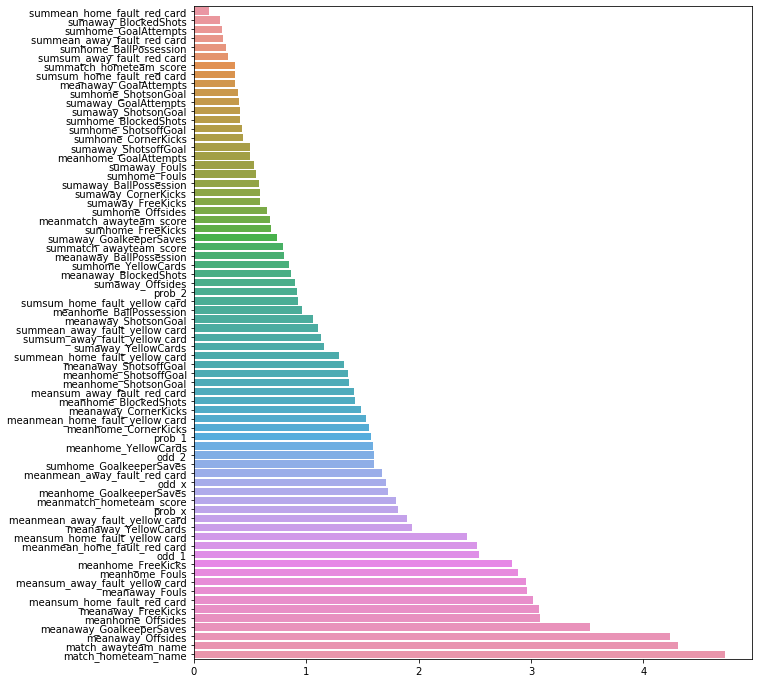

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))
plottingg=pd.DataFrame()
plottingg["imp"]=model.feature_importances_
plottingg["names"]=model.feature_names_
plottingg=plottingg.sort_values(by="imp")
sns.barplot(x=plottingg["imp"].values,y=plottingg["names"].values)

In [0]:
labels_list=[tranform_dict[i] for i in y_valid]
probs=model.predict_proba(X_valid)

In [58]:
a=[rps_single(probs[i],labels_list[i]) for i in range(len(probs))]
print("Validation results: ",sum(a)/len(a))

Validation results:  0.1738587534867916


In [0]:
# p=model.plot_tree(
#     tree_idx=0,
#     pool=X_valid # "pool" is required parameter for trees with one hot features
# )
# p.render('round-table.pdf', view=False)

###### Cross Validation

In [0]:
# from sklearn.model_selection import GridSearchCV,StratifiedKFold,ParameterGrid

# param_grid={
#     "learning_rate":[0.1],
#     "depth":[14,12],
#     "subsample":[0.2,0.95],
#     "max_bin":[150,255]
# }
# X,y=train_csv.drop(columns=[0,"result"]).values.copy(),train_csv["result"].values.copy()

# sk_folds=StratifiedKFold(n_splits=3, random_state=1337, shuffle=True)
# sk_folds_splitted=sk_folds.split(X,y)
# cv_results_df=[]
# param_list=list(ParameterGrid(param_grid))
# for i in [0,1,2,3]:
#     X_train,X_test,y_train,y_test=train_test_split(train_csv.drop(columns=[0,"result"]),train_csv["result"].values,test_size=0.1,shuffle=True)
#     for params in param_list:
#         model = CatBoostClassifier(learning_rate=params["learning_rate"],num_boost_round=5000,objective="MultiClass",early_stopping_rounds=500,
#                           task_type="GPU",
#                           random_state=1337,
#                         #   reg_lambda=0.01,
#                            depth=params["depth"],
#                           bootstrap_type="Poisson",
#                           subsample=params["subsample"],
#                           max_bin=params["max_bin"]
#                         # ,grow_policy="SymmetricTree"
#                           )
#         eval_set=[(X_test,y_test)]
#         print("CV Started {}.fold".format(i+1))
#         print(params)
#         model.fit(X_train,y_train,
#                 eval_set=eval_set,
#                 cat_features=var_sets,verbose=100)
#         tranform_dict={"away":[1,0,0],"draw":[0,1,0],"home":[0,0,1]}
#         labels_list=[tranform_dict[i] for i in y_test]
#         probs=model.predict_proba(X_test)
#         a=[rps_single(probs[i],labels_list[i]) for i in range(len(probs))]
#         rps_res=sum(a)/len(a)
#         cv_results_df.append([i+1,rps_res,model.best_score_["learn"]["MultiClass"],model.best_score_["validation"]["MultiClass"]])
#         print("{}. fold, rps results: {}, train_score: {}, test_score: {}".format(i+1,rps_res,model.best_score_["learn"]["MultiClass"],model.best_score_["validation"]["MultiClass"]))

In [0]:
# cv_results_df=pd.DataFrame(cv_results_df)
# a=pd.concat([pd.DataFrame().from_dict(param_list)]*4).reset_index(drop=True)
# cv_results_df=pd.concat([cv_results_df,a],axis=1).sort_values(by=[1])
# cv_results_df.to_csv("drive/My Drive/colab_datas/cv_results.csv",index=False)
# cv_results_df

###### Crawling the current bet data

In [0]:
import requests
import re
from bs4 import BeautifulSoup

r=requests.get("https://www.betexplorer.com/soccer/england/premier-league/")
soup=BeautifulSoup(r.text,"html.parser")
bet_data=[]
for tag in soup.find_all("tr")[1:11]:
    teams=tag.find_all("a")[0].find_all("span")
    home,away=teams[0].text,teams[1].text
    odd_h=tag.find_all("a")[1].get("data-odd")
    odd_d=tag.find_all("a")[2].get("data-odd")
    odd_a=tag.find_all("a")[3].get("data-odd")
    match_id=unfinished_matches[(unfinished_matches["match_status"].isnull())&(unfinished_matches["match_hometeam_name"]==home)&(unfinished_matches["match_awayteam_name"]==away)]["match_id"].values[0]
    norm_s=(1/np.array([float(odd_h),float(odd_d),float(odd_a)]))
    norm_s=norm_s/norm_s.sum()
    bet_data.append([match_id,home,away,float(odd_h),float(odd_d),float(odd_a)]+norm_s.tolist())
bet_data=pd.DataFrame(bet_data,columns=["match_id","a","b","odd_1","odd_2","odd_x","prob_1","prob_2","prob_x"])
bet_data

,match_id,a,b,odd_1,odd_2,odd_x,prob_1,prob_2,prob_x
0,273302,Brighton,Chelsea,3.81,3.66,1.96,0.250950,0.261235,0.487816
1,273303,Burnley,Aston Villa,1.84,3.76,4.25,0.520209,0.254571,0.225220
2,273306,Newcastle,Leicester,5.76,4.13,1.59,0.166187,0.231777,0.602036
3,273308,Southampton,Tottenham,3.39,3.57,2.13,0.282396,0.268157,0.449447
4,273309,Watford,Wolves,3.23,3.36,2.28,0.296035,0.284581,0.419383
5,273305,Manchester City,Everton,1.27,6.27,10.21,0.753614,0.152646,0.093740
6,273307,Norwich,Crystal Palace,2.44,3.45,2.88,0.391471,0.276866,0.331663
7,273310,West Ham,Bournemouth,1.94,3.78,3.75,0.492475,0.252752,0.254774
8,273301,Arsenal,Manchester Utd,2.67,3.63,2.52,0.357774,0.263156,0.379070
9,273304,Liverpool,Sheffield Utd,1.27,5.79,11.59,0.752490,0.165054,0.082456


In [0]:
round_predicted=bet_data["match_id"].values.tolist()

In [0]:
test_matches=unfinished_matches.loc[unfinished_matches.match_id.isin(round_predicted)]

###### Data Manipulation for the test data

In [0]:
new_df_test=[]
from tqdm import tqdm
m_ids=test_matches["match_id"].values
for m_id in tqdm(test_matches["match_id"].values):

    home_team=unfinished_matches[unfinished_matches["match_id"]==m_id]["match_hometeam_name"].values[0]
    away_team=unfinished_matches[unfinished_matches["match_id"]==m_id]["match_awayteam_name"].values[0]
    test_csv=new_df.drop(columns=["match_id","result","match_hometeam_score","match_awayteam_score"])
    home_data=test_csv[test_csv["match_hometeam_name"]==home_team][[i for i in test_csv.columns if "home" in i]].iloc[-1]
    away_data=test_csv[test_csv["match_hometeam_name"]==away_team][[i for i in test_csv.columns if "away" in i]].iloc[-1]
    match_data_ft=pd.concat([home_data,away_data],axis=0)
    new_df_test.append(match_data_ft)
new_df_test=pd.concat(new_df_test,axis=1).T
new_df_test["match_id"]=m_ids
new_df_test

100%|██████████| 10/10 [00:00<00:00, 155.91it/s]


,meanmatch_hometeam_score,meanhome_BallPossession,meanhome_BlockedShots,meanhome_CornerKicks,meanhome_Fouls,meanhome_FreeKicks,meanhome_GoalAttempts,meanhome_GoalkeeperSaves,meanhome_Offsides,meanhome_ShotsoffGoal,meanhome_ShotsonGoal,meanhome_YellowCards,meanmean_home_fault_red card,meanmean_home_fault_yellow card,meansum_home_fault_red card,meansum_home_fault_yellow card,summatch_hometeam_score,sumhome_BallPossession,sumhome_BlockedShots,sumhome_CornerKicks,sumhome_Fouls,sumhome_FreeKicks,sumhome_GoalAttempts,sumhome_GoalkeeperSaves,sumhome_Offsides,sumhome_ShotsoffGoal,sumhome_ShotsonGoal,sumhome_YellowCards,summean_home_fault_red card,summean_home_fault_yellow card,sumsum_home_fault_red card,sumsum_home_fault_yellow card,match_hometeam_name,meanmatch_awayteam_score,meanaway_BallPossession,meanaway_BlockedShots,meanaway_CornerKicks,meanaway_Fouls,meanaway_FreeKicks,meanaway_GoalAttempts,meanaway_GoalkeeperSaves,meanaway_Offsides,meanaway_ShotsoffGoal,meanaway_ShotsonGoal,meanaway_YellowCards,meanmean_away_fault_red card,meanmean_away_fault_yellow card,meansum_away_fault_red card,meansum_away_fault_yellow card,summatch_awayteam_score,sumaway_BallPossession,sumaway_BlockedShots,sumaway_CornerKicks,sumaway_Fouls,sumaway_FreeKicks,sumaway_GoalAttempts,sumaway_GoalkeeperSaves,sumaway_Offsides,sumaway_ShotsoffGoal,sumaway_ShotsonGoal,sumaway_YellowCards,summean_away_fault_red card,summean_away_fault_yellow card,sumsum_away_fault_red card,sumsum_away_fault_yellow card,match_awayteam_name,match_id
0,0.869565,0.453043,2.41304,4.52174,10.5435,9.02174,10.2391,3.1087,2.28261,4.65217,3.17391,1.71092,0.0652174,0.608023,0.0652174,1.56522,40,20.84,111,208,485,415,471,143,105,214,146,78.7022,3,27.969,3,72,Brighton,1.50909,0.520909,3.69091,5.23636,11.1636,13.0909,13.0909,3.12727,1.70909,4.54545,4.85455,1.96364,0.0727273,0.51961,0.0727273,1.81818,83,28.65,203,288,614,720,720,172,94,250,267,108,4,28.5786,4,100,Manchester Utd,273302
1,1.11111,0.402963,2.61111,4.22222,10,11.8148,9.40741,3.16667,2.57407,3.53704,3.25926,1.96067,0,0.567438,0,1.66667,60,21.76,141,228,540,638,508,171,139,191,176,105.876,0,30.6417,0,90,Burnley,2.32143,0.5875,3.82143,5.60714,9.125,11.8929,14.9821,1.96429,1.94643,5.44643,5.71429,1.4054,0.0357143,0.468155,0.0357143,1.14286,130,32.9,214,314,511,666,839,110,109,305,320,78.7022,2,26.2167,2,64,Liverpool,273303
2,0.964912,0.382456,2.98246,4,10.0877,11.614,10.9298,3.12281,1.68421,4.31579,3.63158,1.66667,0.0526316,0.505848,0.0526316,1.45614,55,21.8,170,228,575,662,623,178,96,246,207,95,3,28.8333,3,83,Newcastle,2.2807,0.587193,3.77193,5.63158,9.10526,11.8421,14.9825,2,1.92982,5.45614,5.75439,1.39828,0.0350877,0.477485,0.0350877,1.14035,130,33.47,215,321,519,675,854,114,110,311,328,79.7022,2,27.2167,2,65,Liverpool,273306
3,1.15,0.445,2.7,4.7,10.9167,11.3833,11.1333,3.11667,1.71667,4.6,3.83333,1.8617,0.05,0.538651,0.05,1.46667,69,26.7,162,282,655,683,668,187,103,276,230,111.702,3,32.319,3,88,Southampton,0.966102,0.472203,2.64407,4.50847,10.5932,9.10169,10.8305,3.42373,2.20339,4.71186,3.47458,1.80641,0.0677966,0.593785,0.0677966,1.64407,57,27.86,156,266,625,537,639,202,130,278,205,106.578,4,35.0333,4,97,Brighton,273308
4,1.06667,0.4415,3.01667,4.21667,11.2333,12.0167,10.6667,3.43333,1.91667,4.21667,3.43333,1.97837,0.0666667,0.533909,0.0666667,1.65,64,26.49,181,253,674,721,640,206,115,253,206,118.702,4,32.0345,4,99,Watford,2.54839,0.668387,5.03226,7.59677,9.19355,10.0645,17.629,1.90323,2.41935,6.06452,6.53226,1.70968,0.016129,0.518779,0.016129,1.66129,158,41.44,312,471,570,624,1093,118,150,376,405,106,1,32.1643,1,103,Manchester City,273309
5,1.07843,0.473137,2.47059,4.39216,9.4902,13.2353,10.4314,3.64706,2.09804,4.11765,3.84314,1.93875,0.0196078,0.587255,0.0196078,1.64706,55,24.13,126,224,484,675,532,186,107,210,196,98.8761,1,29.95,1,84,West Ham,1.46667,0.573167,3.71667,6.23333,10.4167,13.45,12.85,3.18333,2.38333,4.61667,4.51667,1.96667,0.05,0.457163,0.05,1.76667,88,34.39,223,374,625,807,771,191,143,277,271,118,3,27.4298,3,106,Arsen

In [0]:
bet_data

,match_id,a,b,odd_1,odd_2,odd_x,prob_1,prob_2,prob_x
0,273302,Brighton,Chelsea,3.81,3.66,1.96,0.250950,0.261235,0.487816
1,273303,Burnley,Aston Villa,1.84,3.76,4.25,0.520209,0.254571,0.225220
2,273306,Newcastle,Leicester,5.76,4.13,1.59,0.166187,0.231777,0.602036
3,273308,Southampton,Tottenham,3.39,3.57,2.13,0.282396,0.268157,0.449447
4,273309,Watford,Wolves,3.23,3.36,2.28,0.296035,0.284581,0.419383
5,273305,Manchester City,Everton,1.27,6.27,10.21,0.753614,0.152646,0.093740
6,273307,Norwich,Crystal Palace,2.44,3.45,2.88,0.391471,0.276866,0.331663
7,273310,West Ham,Bournemouth,1.94,3.78,3.75,0.492475,0.252752,0.254774
8,273301,Arsenal,Manchester Utd,2.67,3.63,2.52,0.357774,0.263156,0.379070
9,273304,Liverpool,Sheffield Utd,1.27,5.79,11.59,0.752490,0.165054,0.082456


In [0]:
test_csv=pd.merge(new_df_test,bet_data[["match_id","odd_1","odd_2","odd_x","prob_1","prob_2","prob_x"]],how="right",on="match_id")[X_train.columns]

In [0]:
pred_probs=model.predict_proba(test_csv)
pred_probs=pd.DataFrame(pred_probs,columns=tranform_dict.keys())
pred_probs["match_id"]=new_df_test.match_id
pred_probs

,away,draw,home,match_id
0,0.287540,0.366445,0.346014,273302
1,0.550939,0.193293,0.255768,273303
2,0.610071,0.189403,0.200526,273306
3,0.198501,0.549915,0.251583,273308
4,0.439358,0.294751,0.265892,273309
5,0.578554,0.193723,0.227722,273310
6,0.021055,0.014084,0.964861,273305
7,0.351071,0.375020,0.273909,273307
8,0.308843,0.342896,0.348261,273301
9,0.019175,0.015946,0.964879,273304


In [0]:
pred_probs=pred_probs[["match_id","home","draw","away"]]

In [0]:
a=[]
for i in pred_probs.values:
    for j in i:
        if i.tolist().index(j)==0:
            a.append(int(j))
        else:
            a.append(j)
a

[273302,
 0.3460142872631735,
 0.3664454279605815,
 0.28754028477624494,
 273303,
 0.25576799163963915,
 0.19329295572111466,
 0.5509390526392463,
 273306,
 0.20052636724390824,
 0.1894026059766458,
 0.6100710267794459,
 273308,
 0.251583488104027,
 0.5499153238080303,
 0.19850118808794273,
 273309,
 0.265891807275516,
 0.2947505492451497,
 0.4393576434793344,
 273310,
 0.22772217557482008,
 0.19372336296241888,
 0.578554461462761,
 273305,
 0.9648606891437349,
 0.01408428433105234,
 0.021055026525212784,
 273307,
 0.2739092415072868,
 0.3750195491815509,
 0.3510712093111622,
 273301,
 0.34826090335020016,
 0.34289596418642976,
 0.3088431324633701,
 273304,
 0.9648792102293693,
 0.01594597631795231,
 0.01917481345267842]

In [0]:
','.join(map(str,a))

'273302,0.3460142872631735,0.3664454279605815,0.28754028477624494,273303,0.25576799163963915,0.19329295572111466,0.5509390526392463,273306,0.20052636724390824,0.1894026059766458,0.6100710267794459,273308,0.251583488104027,0.5499153238080303,0.19850118808794273,273309,0.265891807275516,0.2947505492451497,0.4393576434793344,273310,0.22772217557482008,0.19372336296241888,0.578554461462761,273305,0.9648606891437349,0.01408428433105234,0.021055026525212784,273307,0.2739092415072868,0.3750195491815509,0.3510712093111622,273301,0.34826090335020016,0.34289596418642976,0.3088431324633701,273304,0.9648792102293693,0.01594597631795231,0.01917481345267842'

In [0]:
pred_probs.to_csv("pred.csv",index=False)